# Modelo de Regresion Logistica 

## Clasificación de especies de flores Iris según sus medidas.

La regresión logística permite predecir categorías a partir de variables numéricas. En este caso, usamos `Iris.csv`  para identificar a qué especie pertenece cada flor (Setosa, Versicolor o Virginica).

### Importacion de Dependencias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Importar y crear el DataFrame

In [5]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Verificar si existen valores Nulos

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Verificar si existen datos duplicados

In [8]:
df.duplicated().sum()

np.int64(0)

### Convertir a numerico la columna categorica

In [9]:
df['label'] = df['Species'].map({"Iris-setosa": 0,"Iris-versicolor": 1,"Iris-virginica": 2})
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Definir Variables:
* `x` = Usamos estas columnas porque son las características que mejor separan las tres especies de flores.
* `y` = Representa la clase a predecir

In [10]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['label']


### Crear Modelo de Regresion Logistica (Clasificacion Binaria)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

### Entrenar modelo

In [12]:
model.fit(x,y)

LogisticRegression(max_iter=5000)

### Prediccion

* Ejemplo n°1 de predicción: 

In [13]:
Ejemplo1 = [[5.1, 3.5,1.4,0.2]]
result = model.predict(Ejemplo1)
print("Predicción:", result[0])


Predicción: 0


c:\Users\IPF-2025\Desktop\06-06-py\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


* Ejemplo n°2 de predicción: 


In [14]:
Ejemplo2 = [[7.2,3.6,6.1,2.5,]]
result = model.predict(Ejemplo2)
print("Predicción:", result[0])

Predicción: 2


c:\Users\IPF-2025\Desktop\06-06-py\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Identificacion de las predicciones con sus probabilidades

In [15]:
result = model.predict(Ejemplo1)
if result[0] == 0: 
    print("Es setosa")
elif result[0] == 1:
    print("Es versicolor")
else: 
    print("Es virginia")

resultado = model.predict_proba(Ejemplo1)
print(f"Probabilidad de setosa: {resultado[0][0]:.2f}")
print(f"Probabilidad de versicolor: {resultado[0][1]:.2f}")
print(f"Probabilidad de virginia: {resultado[0][2]:.2f}")

Es setosa
Probabilidad de setosa: 0.98
Probabilidad de versicolor: 0.02
Probabilidad de virginia: 0.00


c:\Users\IPF-2025\Desktop\06-06-py\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\IPF-2025\Desktop\06-06-py\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Guardar el modelo entrenado en un archivo `.pkl`

In [16]:
import joblib
joblib.dump(model, "Iris.pkl")

['Iris.pkl']

### Cargar y utilizar el modelo guardado

In [17]:
iris = joblib.load("Iris.pkl")
iris.predict(Ejemplo2)

c:\Users\IPF-2025\Desktop\06-06-py\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

### Gráfico de los datos de entrenamiento y las predicciones realizadas por el modelo.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

In [19]:
X = x.values if hasattr(x, 'values') else x
Y = x.values if hasattr(y, 'values') else y

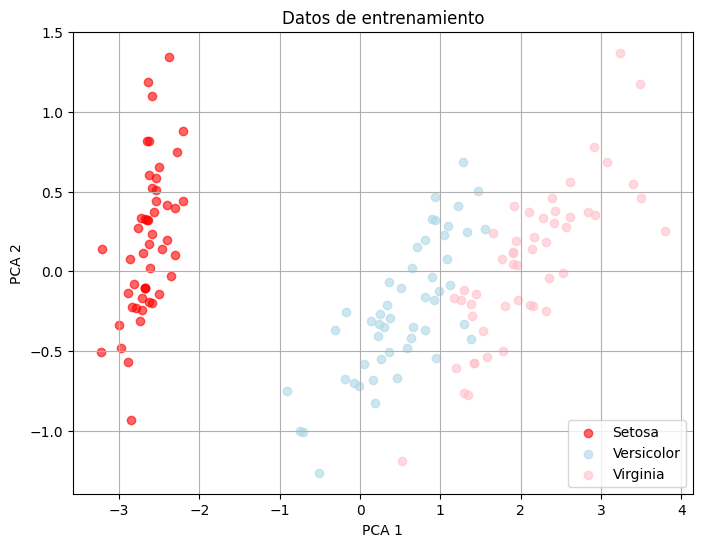

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_2d[y == 0][:,0], x_2d[y ==0][:,1], color='red', label="Setosa", alpha=0.6)
plt.scatter(x_2d[y == 1][:,0], x_2d[y ==1][:,1], color='lightblue', label="Versicolor", alpha=0.6)
plt.scatter(x_2d[y == 2][:,0], x_2d[y ==2][:,1], color='pink', label="Virginia", alpha=0.6)
plt.title("Datos de entrenamiento")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\IPF-2025\Desktop\06-06-py\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


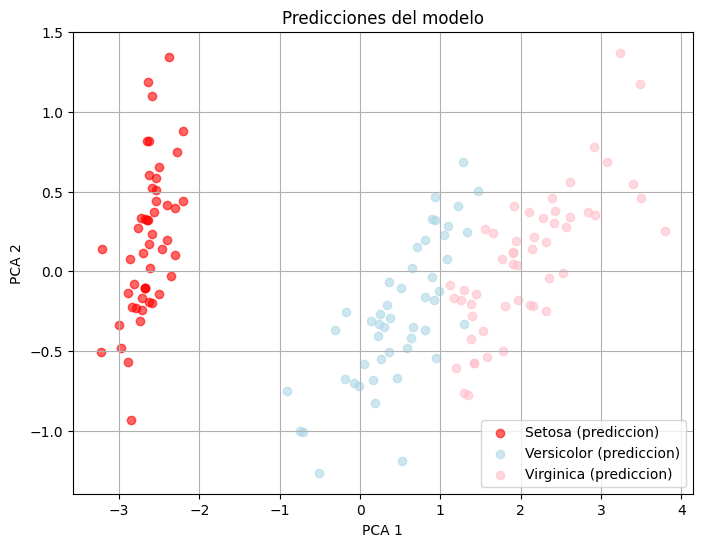

In [23]:

y_pred = model.predict(X)
plt.figure(figsize=(8,6))
plt.scatter(x_2d[y_pred == 0][:,0], x_2d[y_pred == 0][:,1], color='red', label="Setosa (prediccion)", marker='o', alpha=0.6)
plt.scatter(x_2d[y_pred == 1][:,0], x_2d[y_pred == 1][:,1], color='lightblue', label="Versicolor (prediccion)", marker='o', alpha=0.6)
plt.scatter(x_2d[y_pred == 2][:,0], x_2d[y_pred == 2][:,1], color='pink', label="Virginica (prediccion)", marker='o', alpha=0.6)
plt.title("Predicciones del modelo")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()